# ABS Marriages and divorces 3310.0

## Python set-up

In [1]:
# analytic imports
import matplotlib.pyplot as plt
import pandas as pd
import readabs as ra
from readabs import metacol as mc
import mgplot as mg

# pandas display settings
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

# display charts in this notebook
SHOW = False
RFOOTER = "ABS 3310.0"

In [2]:
# save charts in this notebook
CHART_DIR = "./CHARTS/marriages_and_divorces/"
mg.set_chart_dir(CHART_DIR)
mg.clear_chart_dir()

## Get data from ABS

In [3]:
m_and_d = (
    "https://www.abs.gov.au/statistics/people/people-and-communities/"
    "marriages-and-divorces-australia/latest-release"
)
tables =ra.grab_abs_url(url=m_and_d)
len(tables), tables.keys()

(5,
 dict_keys(['Marriages%20and%20Divorces%20%28Australia%29%202024---Contents', 'Marriages%20and%20Divorces%20%28Australia%29%202024---Table 1', 'Marriages%20and%20Divorces%20%28Australia%29%202024---Table 2', 'Marriages%20and%20Divorces%20%28Australia%29%202024---Table 3', 'Marriages%20and%20Divorces%20%28Australia%29%202024---Further information']))

## Marriages

In [4]:
m_table = tables['Marriages%20and%20Divorces%20%28Australia%29%202024---Table 1'].T
m_table = m_table.dropna(axis=0, how='all').dropna(axis=1, how='all')
m_table = m_table.drop(columns=[0, 1, 2, 4])

m_table = m_table.set_index(3)
m_table.columns = m_table.iloc[0]
m_table = m_table[2:]
m_table.index = m_table.index.astype(int)
m_table

nan,Total marriages registered,Crude marriage rate (aged 16 and over),State or territory of registration,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Marriages including same and non-binary gender,Male marriages of the same gender,Female marriages of the same gender,Marriages including a person of non-binary gender,Total marriages including the same or non-binary gender,As a proportion of all marriages,Males,Male marriages registered by age,Age group (years),16–19,20–24,25–29,30–34,35–39,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75 and over,Total,Male age-specific marriage rates,Age group (years),16–19,20–24,25–29,30–34,35–39,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75 and over,Median age at marriage,Females,Female marriages registered by age,Age group (years),16–19,20–24,25–29,30–34,35–39,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75 and over,Total,Female age-specific marriage rates,Age group (years),16–19,20–24,25–29,30–34,35–39,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75 and over,Median age at marriage,na - not available,There are a range of administrative factors that affect the timeliness of marriages being registered in a given year.,"To ensure confidentiality of cells with small values, some data may be randomly adjusted or suppressed.",Restrictions put in place during the first two years of the COVID-19 pandemic had a direct impact on marriages in 2020 and 2021. Comparisons to other years should be treated with caution.,Crude rates are based on estimated resident population 16 years and over to align with legal marriage ages in Australia.,Marriage between people of the same sex or gender was introduced from December 2017 with changes to the Marriages Act 1961.,"In September 2021, marriage registration forms were updated to record gender identity including male, female and non-binary. This question was made optional meaning totals from 2022 include gender not stated for some individuals.","Prior to 2022, sex was collected on marriage registration forms. Non-binary gender is not available prior to 2022.","Refer to the Marriages and Divorces, 2024 methodology for more information.",© Commonwealth of Australia
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,78987,3.8,NaN,27609,16628,15917,5429,9561,2016,549,1278,NaN,1116,1785,na,2901,3.7,NaN,NaN,NaN,235,6719,21653,20304,10434,5284,4259,3130,2562,1634,962,642,456,78274,NaN,NaN,0.4,7.7,22.8,21.5,11.4,6.6,5.1,4.1,3.3,2.3,1.6,1.2,0.6,32.2,NaN,NaN,NaN,746,10708,25619,18942,8809,4595,3764,2663,1775,964,545,293,191,79614,NaN,NaN,1.3,12.9,27.3,19.7,9.5,5.6,4.4,3.3,2.2,1.3,0.8,0.5,0.2,30.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,89167,4.3,NaN,27314,18740,21627,6778,10305,2328,796,1279,NaN,1075,1770,na,2845,3.2,NaN,NaN,NaN,194,6452,25232,25108,12004,5635,4148,3457,2562,1698,903,549,441,88383,NaN,NaN,0.3,7.7,27.5,26.7,12.9,6.9,5.1,4.4,3.4,2.4,1.5,1,0.5,32.1,NaN,NaN,NaN,601,10518,30747,23073,9516,4741,3752,2948,1852,1024,533,277,205,89787,NaN,NaN,1.1,13.4,34.1,24.1,10.1,5.7,4.5,3.6,2.3,1.4,0.8,0.5,0.2,30.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,127161.0,6.1,NaN,44953.0,33231.0,25014.0,7268.0,11237.0,2821.0,819.0,1818.0,NaN,1767.0,2667.0,159.0,4593.0,3.6,NaN,NaN,NaN,218.0,7872.0,34085.0,36922.0,17870.0,8741.0,5991.0,5130.0,3654.0,2617.0,1421.0,843.0,604.0,125968.0,NaN,NaN,0.3,9.3,36.9,39.0,19.0,10.4,7.5,6.3,4.8,3.6,2.3,1.5,0.7,32.5,NaN,NaN,NaN,675.0,12749.0,42410.0,34718.0,14501.0,7324.0,5412.0,4464.0,2620.0,1538.0,738.0,361.0,248.0,127758.0,NaN,NaN,1.2,16.1,47.0,35.9,15.2,8.5,6.6,5.3,3.4,2.0,1.1,0.6,0.2,30.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,118439.0,5.5,NaN,39018.0,29816.0,23826.0,7782.0,13120.0,2506.0,794.0,1562.0,NaN,1735.0,2619.0,204.0,4558.0,3.8,NaN,NaN,NaN,224.0,7226.0,30384.0,33341.0,17001.0,8732.0,5836.0,5025.0,3704.0,2664.0,1533.0,817.0,700.0,117187.0,NaN,NaN,0.3,8.1,31.2,33.9,17.7,9.9,7.3,6.1,4.9,3.6,2.4,1.5,0.7,32.9,NaN

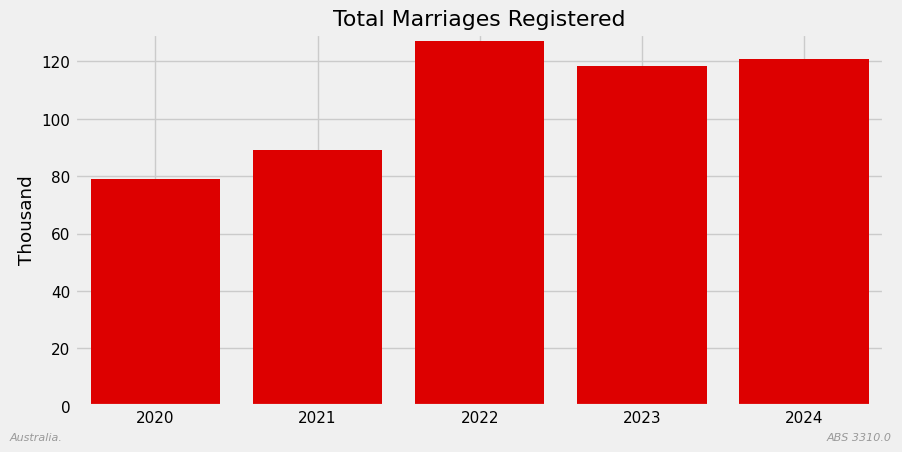

In [5]:
s, u = ra.recalibrate(
    m_table['Total marriages registered'].astype(float),
    units='Number',
)
mg.bar_plot_finalise(
    s,
    title="Total Marriages Registered",
    rotation=0,
    ylabel=u,
    rfooter=RFOOTER,
    lfooter="Australia. ",
    show=True,
)

## Divorces

In [6]:
tables['Marriages%20and%20Divorces%20%28Australia%29%202024---Table 2'].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
This tab outlines marriages occuring by month 2019 to 2023 and state or territory of registration for 2023. It ranges from cell A1 to O26.,Australian Bureau of Statistics,"Table 2: Month of marriage occurring in 2020-2024, and 2024 by state/territory of registration","Marriages and Divorces, Australia, 2024",NaN,2020,2021,2022,2023,2024,2024 occurrence by state or territory of registration,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,There are a range of administrative factors that affect the timeliness of marriages being regist...,"To ensure confidentiality of cells with small values, some data may be randomly adjusted or supp...",Restrictions put in place during the first two years of the COVID-19 pandemic had a direct impac...,Marriage data is based on the state or territory of registration rather than usual residence.,"The data presented in this table are based on the year in which the marriage occurred, rather th...","Refer to the Marriages and Divorces, 2024 methodology for more information.",© Commonwealth of Australia
Unnamed: 1,NaN,NaN,NaN,NaN,no.,no.,no.,no.,no.,NaN,no.,no.,no.,no.,no.,no.,no.,no.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,NaN,NaN,NaN,January,7084,6781,8830,7803,7387,NaN,2339,2357,909,560,827,265,36,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,NaN,February,10716,7988,12037,8997,10031,NaN,3164,3216,1218,730,1170,356,39,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,March,10624,11889,13045,13348,12860,NaN,4198,3812,1762,954,1575,340,28,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,NaN,NaN,NaN,April,3267,10530,12846,11399,11834,NaN,4024,2905,2301,815,1370,201,63,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,NaN,NaN,NaN,May,3607,9462,9505,8540,8856,NaN,2988,2112,2072,473,924,113,66,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,NaN,NaN,NaN,June,3085,5608,6576,6581,7285,NaN,2419,1654,1933,318,665,99,115,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,NaN,NaN,NaN,July,3610,3960,6684,6307,6318,NaN,2019,1401,1698,288,632,71,127,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,NaN,NaN,NaN,August,4645,3013,7210,7309,8869,NaN,2957,1814,2618,370,807,107,99,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finished

In [7]:
# watermark
%load_ext watermark
%watermark -u -t -d --iversions --watermark --machine --python --conda


Last updated: 2025-07-26 17:37:49

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.4.0

conda environment: n/a

Compiler    : Clang 20.1.4 
OS          : Darwin
Release     : 24.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

matplotlib: 3.10.3
mgplot    : 0.2.12
pandas    : 2.3.1
readabs   : 0.1.4

Watermark: 2.5.0



In [8]:
print("Done")

Done
